In [2]:
from tensorflow.keras.datasets import imdb
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

word_index = imdb.get_word_index()

word_index = {k: v + 3 for k, v in word_index.items()}
word_index["[PAD]"] = 0  
word_index["[START]"] = 1 
word_index["[UNK]"] = 2   
word_index["[MASK]"] = 3 

index_word = {v: k for k, v in word_index.items()}

def indices_to_text(indices):
    return ' '.join([index_word.get(i, '[UNK]') for i in indices])


texts_train = [indices_to_text(item) for item in train_data]
texts_test = [indices_to_text(item) for item in test_data]

df_train = pd.DataFrame({"data": train_data, "text": texts_train, "label": train_labels})
df_test = pd.DataFrame({"data": test_data, "text": texts_train, "label": test_labels})

del texts_train, texts_test, train_data, test_data, test_labels, train_labels

df_train.head()

2025-03-15 19:31:46.912645: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-15 19:31:48.070239: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


,data,text,label
0,"[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, ...",[START] this film was just brilliant casting l...,1
1,"[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463,...",[START] big hair big boobs bad music and a gia...,0
2,"[1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5...",[START] this has to be one of the worst films ...,0
3,"[1, 4, 2, 2, 33, 2804, 4, 2040, 432, 111, 153,...",[START] the [UNK] [UNK] at storytelling the tr...,1
4,"[1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637, 1...",[START] worst mistake of my life br br i picke...,0


### Dense Model

In [3]:
from tqdm import tqdm

tqdm.pandas()

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))  # Create an all-zero matrix of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

vec_train = vectorize_sequences(np.array(df_train['data']))
vec_test = vectorize_sequences(np.array(df_test['data']))

df_train['vect_sequnce'] = list(vec_train)
df_test['vect_sequnce'] = list(vec_test)

df_train['label'] = df_train['label'].apply(lambda x: np.asarray(x).astype(np.float32))
df_test['label'] = df_test['label'].apply(lambda x: np.asarray(x).astype(np.float32))

df_train

,data,text,label,vect_sequnce
0,"[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, ...",[START] this film was just brilliant casting l...,1.0,"[0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
1,"[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463,...",[START] big hair big boobs bad music and a gia...,0.0,"[0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
2,"[1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5...",[START] this has to be one of the worst films ...,0.0,"[0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, ..."
3,"[1, 4, 2, 2, 33, 2804, 4, 2040, 432, 111, 153,...",[START] the [UNK] [UNK] at storytelling the tr...,1.0,"[0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
4,"[1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637, 1...",[START] worst mistake of my life br br i picke...,0.0,"[0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
...,...,...,...,...
24995,"[1, 14, 9, 6, 2758, 20, 21, 1517, 7, 2078, 5, ...",[START] this is a racist movie but worthy of s...,1.0,"[0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
24996,"[1, 4679, 2784, 299, 6, 1042, 37, 80, 81, 233,...",[START] bela lugosi plays a doctor who will do...,0.0,"[0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
24997,"[1, 11, 6, 230, 245, 6401, 9, 6, 1225, 446, 2,...",[START] in a far away galaxy is a planet calle...,0.0,"[0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
24998,"[1, 1446, 7079, 69, 72, 3305, 13, 610, 930, 8,...",[START] six degrees had me hooked i looked for...,1.0,"[0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."


In [4]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

input_dim = len(df_train['vect_sequnce'][0]) 

model = Sequential([
    layers.Dense(32, activation='relu', input_shape=(input_dim,)), 
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid') 
])

model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


df_test, df_val = train_test_split(df_test, test_size=0.5, random_state=42)

2025-03-15 19:31:56.288818: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-03-15 19:31:56.487393: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [5]:
x_train = np.array(df_train['vect_sequnce'].tolist())  
y_train = np.array(df_train['label'].tolist())        

x_val = np.array(df_val['vect_sequnce'].tolist())
y_val = np.array(df_val['label'].tolist())

# Trenowanie modelu
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=512,
    validation_data=(x_val, y_val) 
)

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7169 - loss: 0.5632 - val_accuracy: 0.8816 - val_loss: 0.3058
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9199 - loss: 0.2280 - val_accuracy: 0.8890 - val_loss: 0.2784
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9445 - loss: 0.1606 - val_accuracy: 0.8817 - val_loss: 0.2991
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9632 - loss: 0.1166 - val_accuracy: 0.8761 - val_loss: 0.3274
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9721 - loss: 0.0892 - val_accuracy: 0.8724 - val_loss: 0.3661
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9851 - loss: 0.0597 - val_accuracy: 0.8669 - val_loss: 0.4118
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9920 - loss: 0.0398 - val_accuracy: 0.8648 - val_loss: 0.4566
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9962 - loss: 0.0250 - val_accuracy: 0.8619 - v

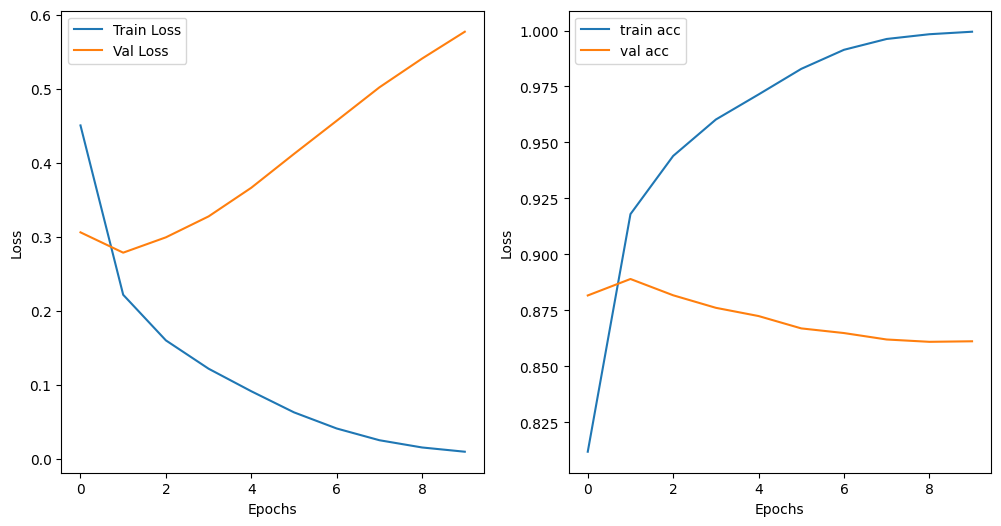

In [6]:
import matplotlib.pyplot as plt

history_dict = history.history

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(history_dict['loss'], label='Train Loss')
axs[0].plot(history_dict['val_loss'], label='Val Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()

axs[1].plot(history_dict['accuracy'], label='train acc')
axs[1].plot(history_dict['val_accuracy'], label='val acc')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()

In [1]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
MODEL_NAME = 'distilbert-base-uncased' 

model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=2).to(device)
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

/home/plorenc/Desktop/AiR_ISS/OpenCL/lab3/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-05-12 09:12:22.401604: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-12 09:12:23.080754: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a

In [ ]:
df_train[['input_ids', 'attention_mask']] = df_train['text'].apply(
    lambda x: pd.Series(tokenizer(x, padding='max_length', truncation=True, max_length=512))
).apply(pd.Series)

df_test[['input_ids', 'attention_mask']] = df_test['text'].apply(
    lambda x: pd.Series(tokenizer(x, padding='max_length', truncation=True, max_length=512))
).apply(pd.Series)


In [ ]:
from datasets import Dataset

train_dataset = Dataset.from_pandas(df_train[['input_ids', 'attention_mask', 'label']])
test_dataset = Dataset.from_pandas(df_test[['input_ids', 'attention_mask', 'label']])

In [10]:
from sklearn.metrics import f1_score, accuracy_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)

    return {"accuracy": acc, "f1": f1}

In [ ]:
from transformers import Trainer, TrainingArguments

batch_size = 12
# Dodajemy liczbę próbek na epokę i dzielimy przez batch_size, aby wyliczyć kroki
save_steps = 100 // batch_size  # Co 100 próbek (steps zależy od batch_size)

training_args = TrainingArguments(
    output_dir='C:/Users/patry/Desktop/step',  # lokalizacja zapisów checkpointów
    num_train_epochs=2,
    #learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    evaluation_strategy='epoch',
    save_steps=save_steps, 
    save_total_limit=3, 
    disable_tqdm=False,
    push_to_hub=False,
    log_level='error'
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)


In [12]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.067800,0.449997,0.501840,0.335380
2,0.040500,0.484285,0.501840,0.335380


TrainOutput(global_step=4168, training_loss=0.06260375372507751, metrics={'train_runtime': 3642.9922, 'train_samples_per_second': 13.725, 'train_steps_per_second': 1.144, 'total_flos': 6623251814400000.0, 'train_loss': 0.06260375372507751, 'epoch': 2.0})

### Podejscie w czystym Torchu

### Ładowanie zbioru danych

In [1]:
from tensorflow.keras.datasets import imdb
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

word_index = imdb.get_word_index()

word_index = {word: (index + 3) for word, index in word_index.items()}

word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3

reverse_word_index = {index: word for word, index in word_index.items()}

2025-05-19 14:26:59.301326: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-19 14:27:00.616171: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Przedkodownaie przed tokenizacja

In [2]:
x_train = []
x_test = []

for idxs in train_data:
    temp_list = []
    for idx in idxs:
        temp_list.append(reverse_word_index[idx])
    x_train.append(temp_list)

for idxs in test_data:
    temp_list = []
    for idx in idxs:
        temp_list.append(reverse_word_index[idx])
    x_test.append(temp_list)

### tokenizacja

In [3]:
from transformers import AutoTokenizer

MODEL_NAME = 'distilbert-base-uncased' 

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

x_train = [' '.join(words) for words in x_train]
x_test = [' '.join(words) for words in x_test]

train_encodings = tokenizer(x_train, truncation=True, padding=True)
test_encodings = tokenizer(x_test, truncation=True, padding=True)

### OneHot na etykietach

In [ ]:
from torch.nn.functional import one_hot

y_train = one_hot(torch.tensor(train_labels, dtype=torch.long), num_classes=2)
y_test = one_hot(torch.tensor(test_labels, dtype=torch.long), num_classes=2)

#y_train = train_labels
#y_test = test_labels

In [5]:
from datasets import Dataset

train_dataset = Dataset.from_dict({
    'input_ids': train_encodings['input_ids'],
    'attention_mask': train_encodings['attention_mask'],
    'labels': y_train
})

test_dataset = Dataset.from_dict({
    'input_ids': test_encodings['input_ids'],
    'attention_mask': test_encodings['attention_mask'],
    'labels': y_test
})

In [6]:
from transformers import AutoModelForSequenceClassification
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=2).to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [7]:
from sklearn.metrics import f1_score, accuracy_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)

    return {"accuracy": acc, "f1": f1}